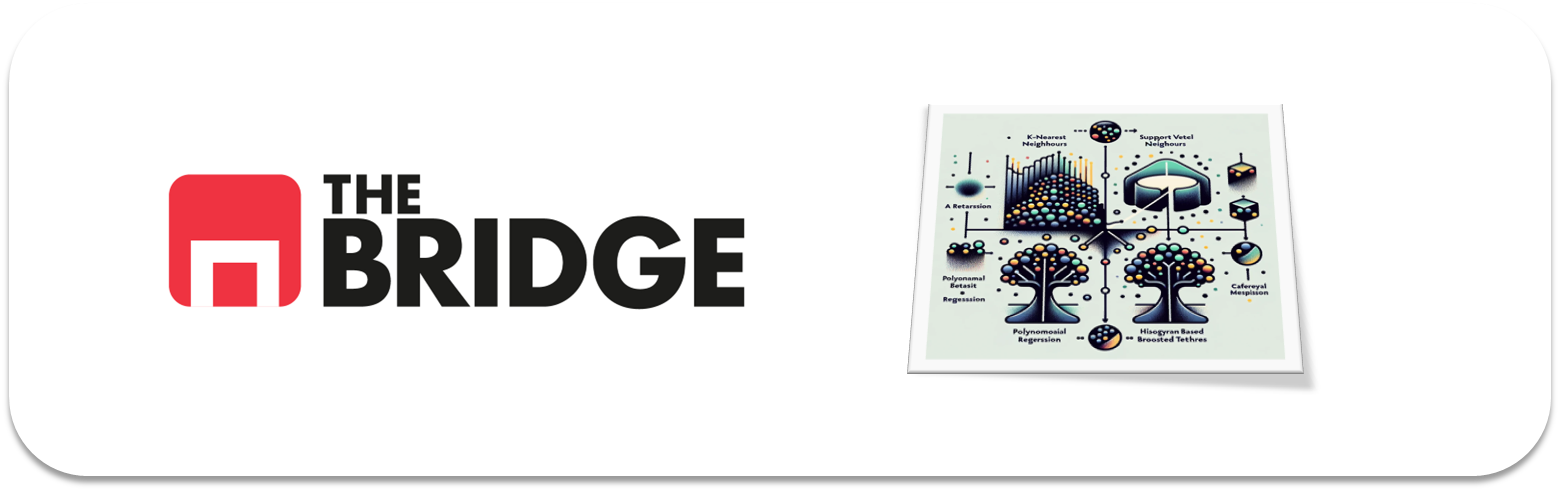

* La práctica consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

### **Librerías**

In [83]:
# Tratamiento de datos
import re
import pandas as pd
import numpy as np
# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
# Modelos
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score, \
roc_curve, roc_auc_score, ConfusionMatrixDisplay, multilabel_confusion_matrix

from sklearn.metrics import mean_absolute_percentage_error #regresion
from sklearn.metrics import balanced_accuracy_score #clasificacion

### **Explicación del dataset y carga de datos**

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

NOTA: El dataset está limpio y sin valores faltantes.

In [84]:
df= pd.read_csv('/Users/itziarc/Desktop/DS_PT_09_2023-main/Machine_Learning/1-Supervisado/4-Ejercicio/datasets/wines_dataset.csv',sep='|')

### **Primer análisis**

In [85]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [87]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [88]:
df.describe(include="object")

,class
count,6497
unique,2
top,white
freq,4898


### **EDA**

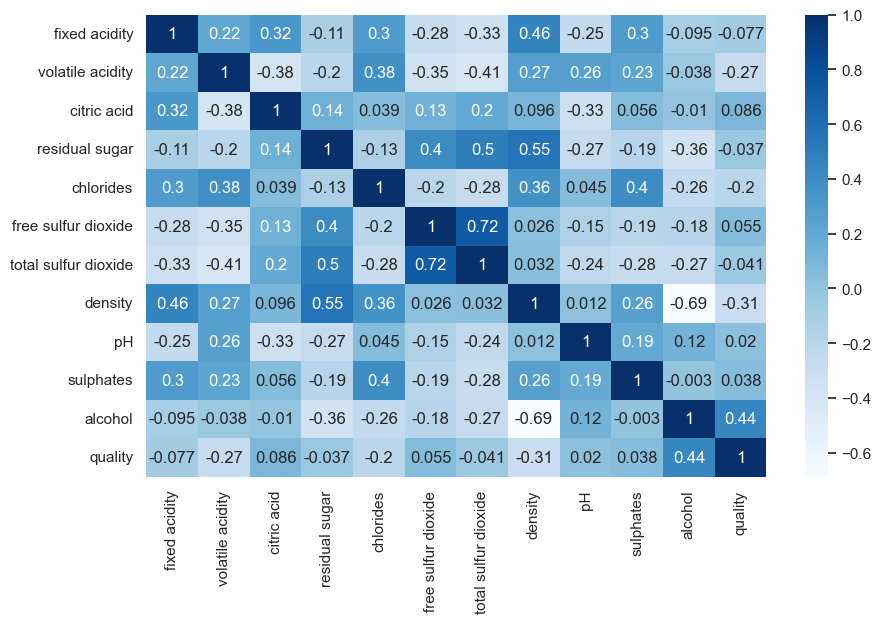

In [89]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues');

In [90]:
df['quality'].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

<Axes: xlabel='quality', ylabel='percent'>

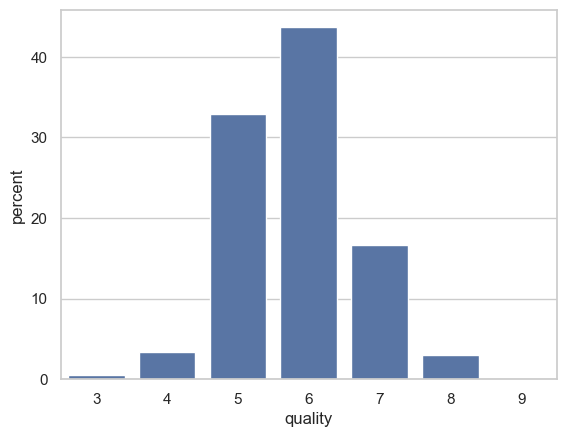

In [91]:
sns.countplot(x='quality',data=df, stat='percent')

<Axes: xlabel='class', ylabel='percent'>

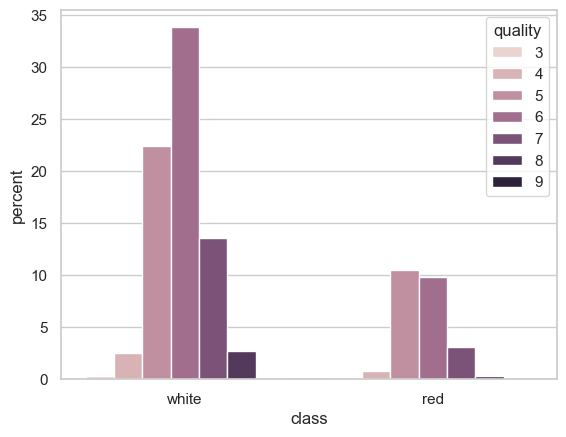

In [92]:
sns.countplot(x='class',data=df, hue='quality', stat='percent')

<Axes: xlabel='alcohol', ylabel='Count'>

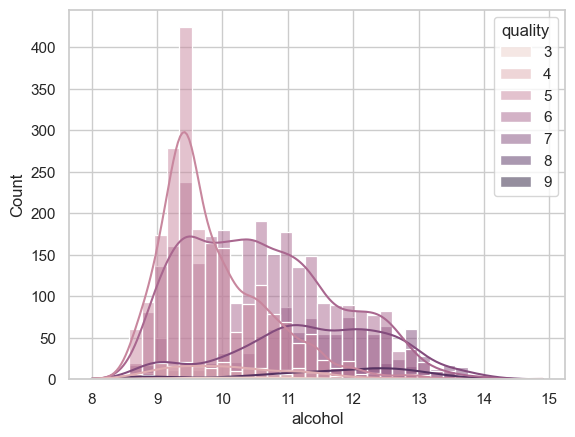

In [93]:
sns.histplot(x='alcohol',data=df, hue='quality', kde=True)

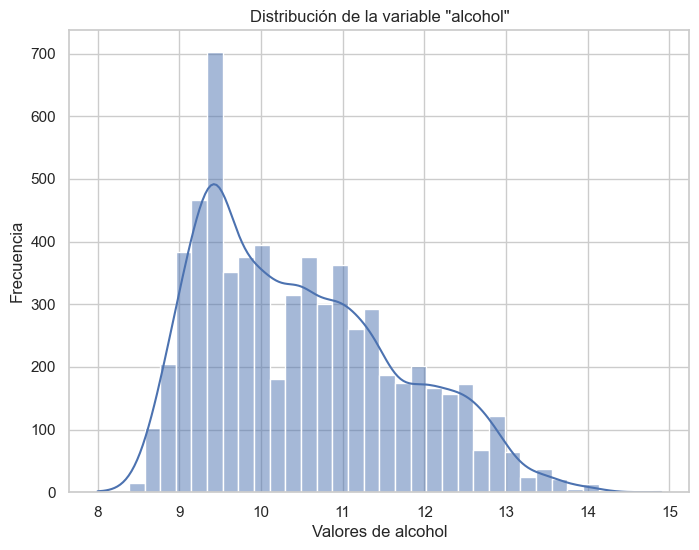

In [94]:
plt.figure(figsize=(8, 6))
sns.histplot(df['alcohol'], kde=True)
plt.title('Distribución de la variable "alcohol"')
plt.xlabel('Valores de alcohol')
plt.ylabel('Frecuencia')
plt.show()

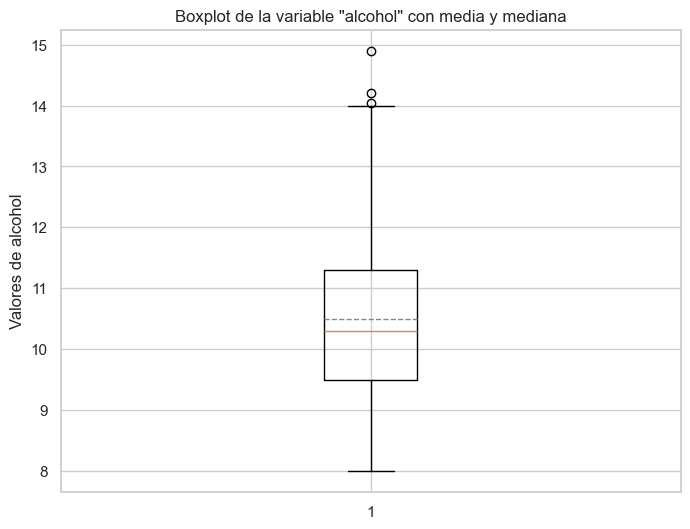

In [95]:
import matplotlib.pyplot as plt

# Crear el boxplot con la media y la mediana
plt.figure(figsize=(8, 6))
plt.boxplot(df['alcohol'], showmeans=True, meanline=True)
plt.title('Boxplot de la variable "alcohol" con media y mediana')
plt.ylabel('Valores de alcohol')
plt.show()

In [96]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'class'],
      dtype='object')

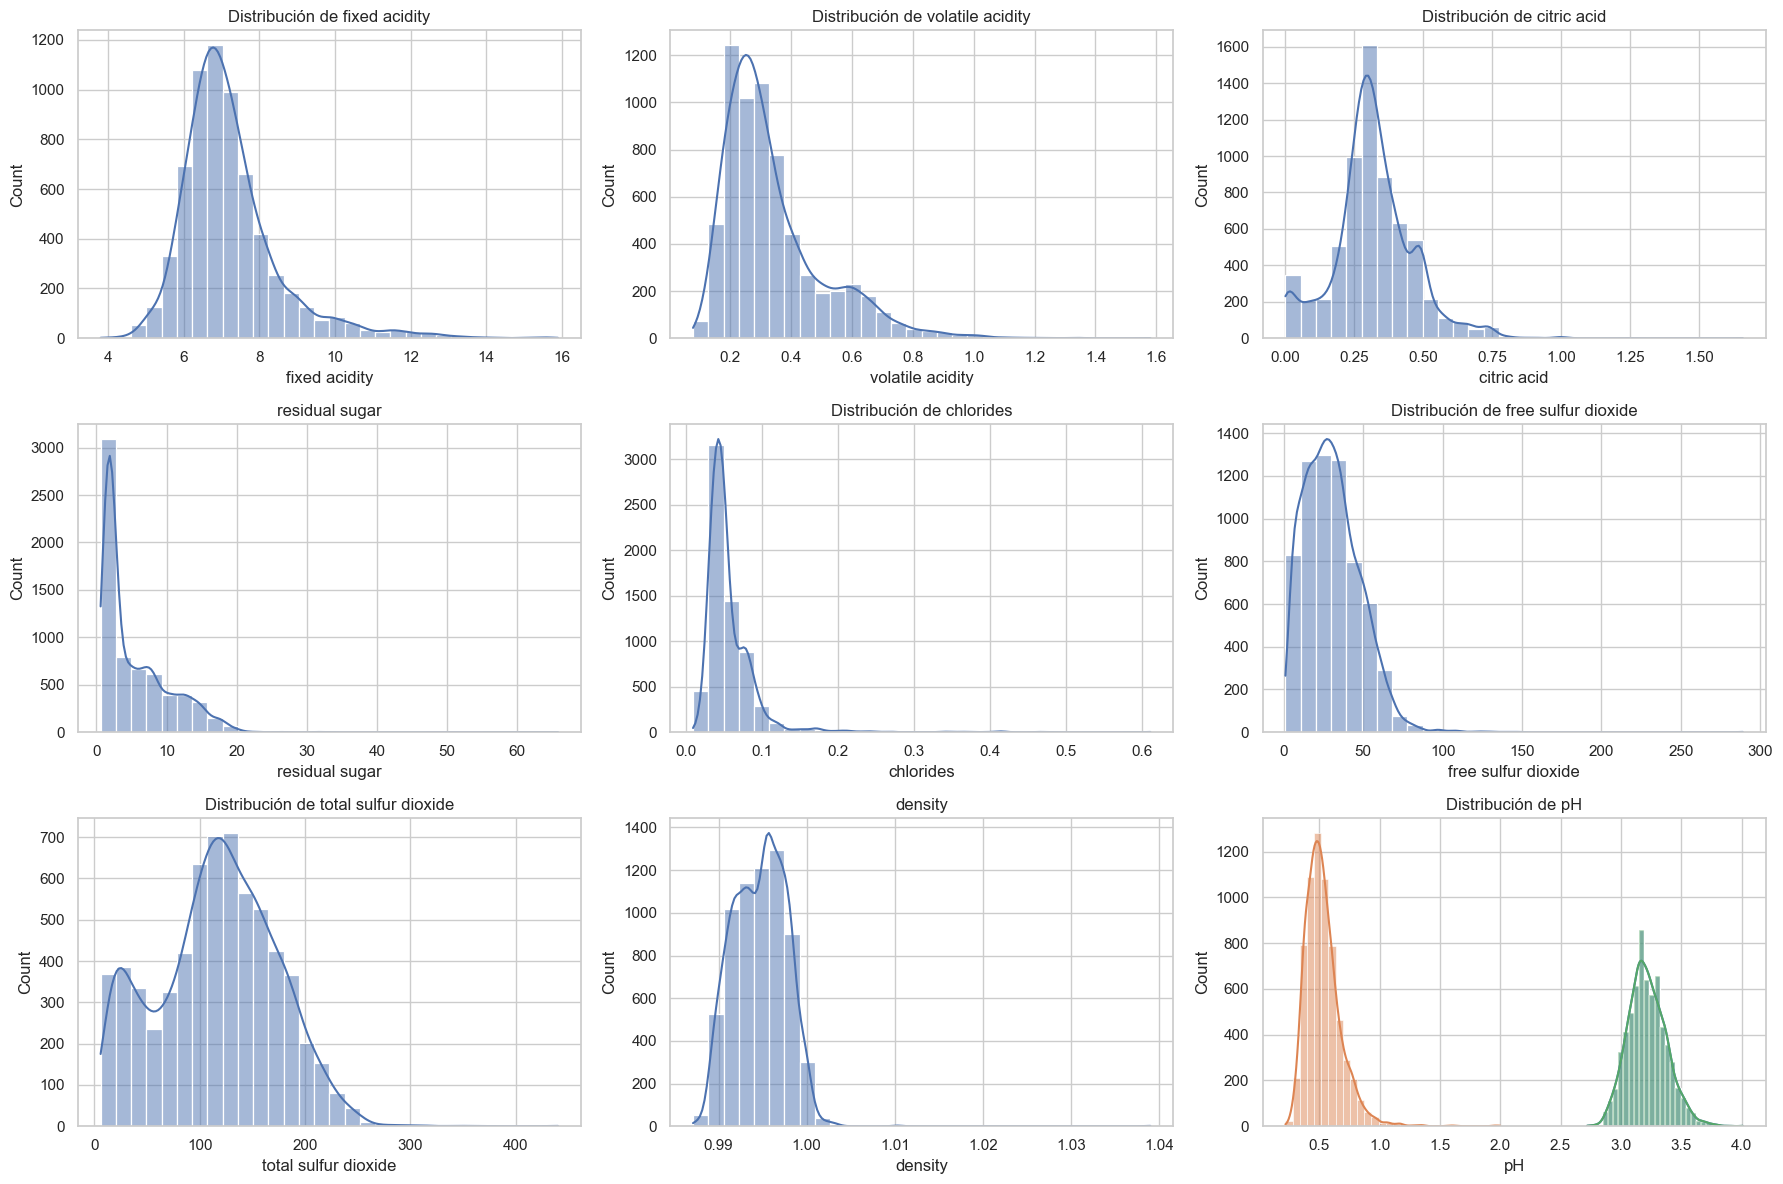

In [97]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(3, 3, figsize=(18, 12))

sns.histplot(df['fixed acidity'], bins=30, ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Distribución de fixed acidity')

sns.histplot(df['volatile acidity'], bins=30, ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Distribución de volatile acidity')


sns.histplot(df['citric acid'], bins=30, ax=axes[0, 2], kde=True)
axes[0, 2].set_title('Distribución de citric acid')


sns.histplot(df['residual sugar'], bins=30, ax=axes[1, 0], kde=True)
axes[1, 0].set_title('residual sugar')


sns.histplot(df['chlorides'], bins=30, ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Distribución de chlorides')


sns.histplot(df['free sulfur dioxide'], bins=30, ax=axes[1, 2], kde=True)
axes[1, 2].set_title('Distribución de free sulfur dioxide')

sns.histplot(df['total sulfur dioxide'], bins=30, ax=axes[2, 0], kde=True)
axes[2, 0].set_title('Distribución de total sulfur dioxide')

sns.histplot(df['density'], bins=30, ax=axes[2, 1], kde=True)
axes[2, 1].set_title('density')

sns.histplot(df['pH'], bins=30, ax=axes[2, 2], kde=True)
axes[2, 2].set_title('Distribución de pH')

sns.histplot(df['sulphates'], bins=30, ax=axes[2, 2], kde=True)
axes[2, 2].set_title('Distribución de sulphates')

sns.histplot(df['pH'], bins=30, ax=axes[2, 2], kde=True)
axes[2, 2].set_title('Distribución de pH')

plt.tight_layout()
plt.show()

### #2 Modelado para clasificación

In [98]:
df_cla=df.copy()

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros. El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora.

In [99]:
X_train, X_test, y_train, y_test = train_test_split(df_cla.drop(columns=['quality']), df_cla['quality'], test_size=0.2, random_state=73)

In [100]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5197, 12)
(1300, 12)
(5197,)
(1300,)


### **Escalado y onehot**

In [101]:
df_cla.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'class'],
      dtype='object')

In [104]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler, OneHotEncoder
import numpy as np

# Columnas para aplicar logaritmo
log_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
               'chlorides', 'free sulfur dioxide']

# Columnas para aplicar MinMaxScaler
minmax_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                  'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                  'pH', 'sulphates', 'alcohol']

# Crear pipeline para preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('log', FunctionTransformer(func=np.log1p), log_columns),
        ('minmax', MinMaxScaler(), minmax_columns),
        ('onehot', OneHotEncoder(), ['class'])
    ]
)


X_train_preprocessed = preprocessor.fit_transform(X_train)

# Aplicar pipeline a X_test
X_test_preprocessed = preprocessor.transform(X_test)


In [105]:
X_train_preprocessed

array([[2.02814825, 0.27763174, 0.3435897 , ..., 0.20289855, 0.        ,
        1.        ],
       [1.82454929, 0.29266961, 0.        , ..., 0.86956522, 1.        ,
        0.        ],
       [2.07944154, 0.28517894, 0.57661336, ..., 0.43478261, 0.        ,
        1.        ],
       ...,
       [1.94591015, 0.35065687, 0.3435897 , ..., 0.24637681, 0.        ,
        1.        ],
       [2.00148   , 0.23111172, 0.19062036, ..., 0.2173913 , 0.        ,
        1.        ],
       [2.05412373, 0.16551444, 0.26236426, ..., 0.14492754, 0.        ,
        1.        ]])

In [107]:
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier()
}

# Definir las métricas a calcular
metrics = ["recall_macro", "precision_macro", "roc_auc_ovr", "balanced_accuracy"]

# Realizar validación cruzada para cada clasificador y métrica
results = {}
for clf_name, clf in classifiers.items():
    results[clf_name] = {}
    for metric in metrics:
        scores = cross_val_score(clf, X_train_preprocessed, y_train, cv=5, scoring=metric)
        results[clf_name][metric] = scores.mean()

# Imprimir los resultados
for clf_name, metrics_dict in results.items():
    print(f"Metrics for {clf_name}:")
    for metric, score in metrics_dict.items():
        print(f"{metric}: {score}")
    print()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Metrics for Logistic Regression:
recall_macro: 0.21604506068057655
precision_macro: 0.24963432144315942
roc_auc_ovr: 0.7188247143798147
balanced_accuracy: 0.21604506068057655

Metrics for Support Vector Machine:
recall_macro: 0.19586156572189592
precision_macro: 0.15529484698622098
roc_auc_ovr: nan
balanced_accuracy: 0.19586156572189592

Metrics for Random Forest:
recall_macro: 0.3516591006689059
precision_macro: 0.5242978122778212
roc_auc_ovr: 0.8286616870715047
balanced_accuracy: 0.35260065751302977



### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara los modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros. Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.